# Naive Bayes

## Roadmap  
1. Data preparation 
   * Import and split the corpus
   * Have a look of the corpus
   * Save the training/validating/testing sets
2. Algorism training
   * Import the algorism
   * Load the data
   * Make predictions
3. Evaluation

## 1.Data preparation  
I skipped `argparse` and `os` at the moment

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## Import the corpus

Three steps: 1. load the corpus, 2. take a peek of the corpora (head & tail, most and least frequent words), 3. split the corpus in three.

In [7]:
def read_corpus(corpus_file):
    data = []
    with open(corpus_file, encoding='utf+8') as in_file:
        for line in in_file:
            parts = line.strip().split(' ', 3) #the corpus data follows the format of catrgory-sentiment-ID-text, so I split each line into 4
            
            if len(parts) == 4: #check if all 4 parts are complete
                
                category, sentiment, id_, text = parts #hope this would work, I'm lost a bit here
                
                #data tagging
                data.append({
                    'category' : category,
                    'sentiment' : sentiment,
                    'id_' : id_,
                    'text' : text 
                })
    return pd.DataFrame(data)

Next step is to analyse the data

In [17]:
def corpus_overview(df, n = 10):
    '''
    Take a high level overview of the dataset
    '''
    print(f'total number of reviews: {len(df)}')
    print(f'number of categories: ' + {df['category'].nunique()})
    print(f'number of sentiments:' + {df['sentiment'].nunique()})
    
    print('\n2. first few lines:')
    print(df.head(n))
    
    print("\n3. final lines:")
    print(df.tail(n))
    
    print("\n4. categorical distribution:")
    cat_dist = df['category'].value_counts()
    print(cat_dist)
    '''
    consider adding the most common and the lest words and sentiment distribution
    '''

In [10]:
#Try loading the corpus
corpus_file = '/Users/hongxuzhou/LfD/Week1/reviews-LfD.txt'
df = read_corpus(corpus_file)

## Corpus overview

In [15]:
print(df.head)

<bound method NDFrame.head of      category sentiment      id_  \
0       music       neg  575.txt   
1         dvd       neg  391.txt   
2      health       neg  848.txt   
3      camera       pos  577.txt   
4         dvd       neg  400.txt   
...       ...       ...      ...   
5995   health       neg  309.txt   
5996   health       pos  101.txt   
5997    music       pos  671.txt   
5998      dvd       neg  235.txt   
5999   camera       neg   96.txt   

                                                   text  
0     the cd came as promised and in the condition p...  
1     this was a very annoying and boring flick that...  
2     the braun ls-5550 silk&soft bodyshave recharge...  
3     when it comes to buying camcorders , i persona...  
4     i had high hopes for this series when i starte...  
...                                                 ...  
5995  i like the idea , but the slippers just are n'...  
5996  i eat one of these twice a week before i play ...  
5997  i get the

In [16]:
corpus_overview(df)

total number of reviews: 6000

2. first few lines:
   category sentiment      id_  \
0     music       neg  575.txt   
1       dvd       neg  391.txt   
2    health       neg  848.txt   
3    camera       pos  577.txt   
4       dvd       neg  400.txt   
5  software       neg   40.txt   
6  software       pos  856.txt   
7    health       pos  391.txt   
8    camera       neg  617.txt   
9    health       neg  598.txt   

                                                text  
0  the cd came as promised and in the condition p...  
1  this was a very annoying and boring flick that...  
2  the braun ls-5550 silk&soft bodyshave recharge...  
3  when it comes to buying camcorders , i persona...  
4  i had high hopes for this series when i starte...  
5  the program works fine on windows xp and is ea...  
6  so i did the unthinkable . i put windows vista...  
7  i bought one of these ' gizmos ' as a gift 3 y...  
8  i thought i was upgrading from analog to digit...  
9  i did n't realize the

## Split the corpus  
The corpus is tagged and re-ordered, so stratified sampling will be used when splitting the corpus in training, validating and testing sets


Training set:
Total samples: 4199
Sentiment distribution:
sentiment
neg    0.505358
pos    0.494642
Name: proportion, dtype: float64
Category distribution:
category
music       0.175042
books       0.170279
software    0.165039
dvd         0.164325
camera      0.163134
health      0.162181
Name: proportion, dtype: float64

Validation set:
Total samples: 901
Sentiment distribution:
sentiment
neg    0.504994
pos    0.495006
Name: proportion, dtype: float64
Category distribution:
category
health      0.192009
dvd         0.168701
software    0.166482
camera      0.166482
music       0.157603
books       0.148724
Name: proportion, dtype: float64

Test set:
Total samples: 900
Sentiment distribution:
sentiment
neg    0.505556
pos    0.494444
Name: proportion, dtype: float64
Category distribution:
category
dvd         0.188889
camera      0.170000
software    0.167778
music       0.166667
books       0.160000
health      0.146667
Name: proportion, dtype: float64


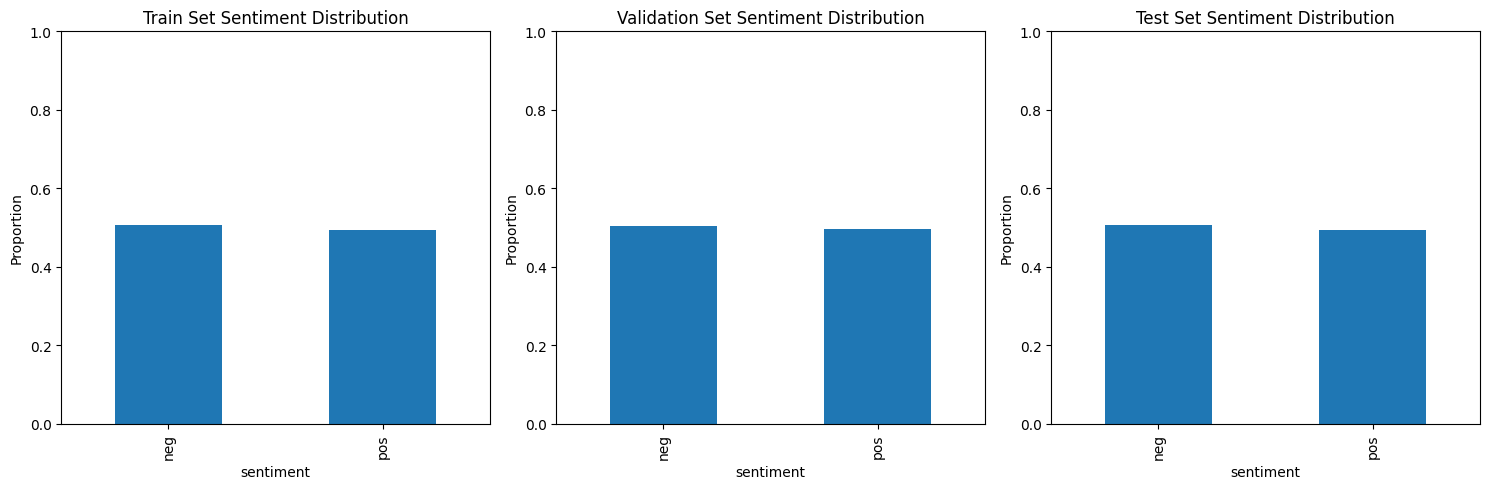

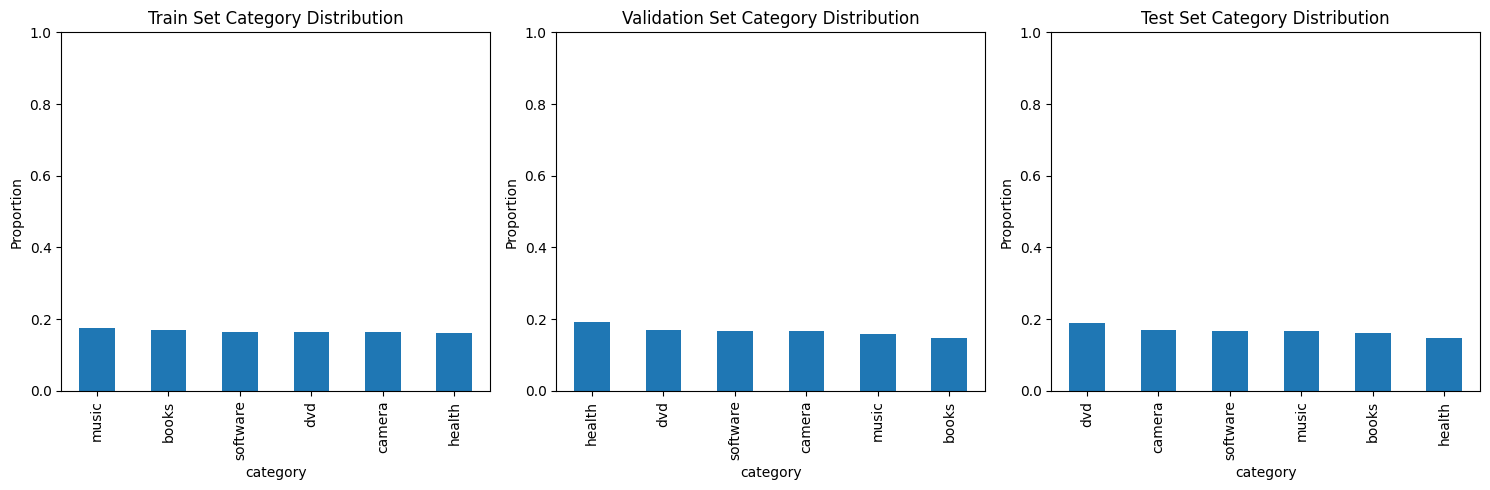

In [21]:
#I resorted to ChatGPT when doing this part, extra careful!!!
from sklearn.model_selection import train_test_split

def split_corpus(df, train_size=0.7, val_size=0.15, test_size=0.15, stratify_col='sentiment'):
    # First, split off the test set
    train_val, test = train_test_split(df, test_size=test_size, stratify=df[stratify_col], random_state=42)
    
    # Then, split the remaining data into train and validation sets
    relative_val_size = val_size / (train_size + val_size)
    train, val = train_test_split(train_val, test_size=relative_val_size, stratify=train_val[stratify_col], random_state=42)
    
    return train, val, test

def analyze_split(df, name):
    print(f"\n{name} set:")
    print(f"Total samples: {len(df)}")
    print("Sentiment distribution:")
    print(df['sentiment'].value_counts(normalize=True))
    print("Category distribution:")
    print(df['category'].value_counts(normalize=True))

# Load the corpus
#corpus_file = 'path/to/your/corpus.txt'  # Replace with your actual file path
#df = read_corpus(corpus_file)

# Split the corpus
train, val, test = split_corpus(df)

# Analyze each split
for name, split in [("Training", train), ("Validation", val), ("Test", test)]:
    analyze_split(split, name)

# Visualize sentiment distribution in each split
plt.figure(figsize=(15, 5))

splits = [train, val, test]
names = ['Train', 'Validation', 'Test']

for i, (split, name) in enumerate(zip(splits, names)):
    plt.subplot(1, 3, i+1)
    split['sentiment'].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{name} Set Sentiment Distribution')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Visualize topic distribution in each split
plt.figure(figsize=(15, 5))

for i, (split, name) in enumerate(zip(splits, names)):
    plt.subplot(1, 3, i+1)
    split['category'].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{name} Set Category Distribution')
    plt.ylabel('Proportion')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

'''
I got the meaning of this code, but it's quite challenging for me to write it from scratch
'''
